In [1]:
import numpy as np
# import pandas as pd
# import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import poisson, gamma

In [2]:
rng = np.random.default_rng(seed=1011)
mu = 5

In [3]:
print('True mean', poisson.mean(mu))
print('Mean', np.mean(poisson.rvs(mu, size=10**7, random_state=rng)))
print('Var', np.var(poisson.rvs(mu, size=10**7, random_state=rng)))

True mean 5.0
Mean 5.0005659
Var 4.997455583437748


In [4]:
a = 8
scale = 4
pi = gamma(a=a, scale=1/scale)
x = np.linspace(pi.ppf(0), pi.ppf(0.999), 100)
pi_mu=np.mean(pi.rvs(size=10**7, random_state=rng))
pi_var=np.var(pi.rvs(size=10**7, random_state=rng))

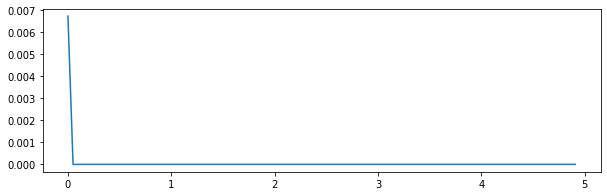

In [5]:
plt.figure(figsize = (10,3))
plt.plot(x, poisson.pmf(x, mu=5))
# plt.vlines(pi.mean(), 0, pi.pdf(x).max(), color='red', label = 'True \n mean {:.2f} \n var {:.2f}'.format(pi.mean(), pi.var()))

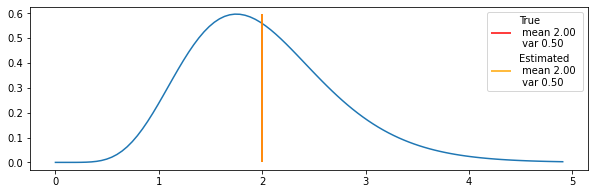

In [6]:
plt.figure(figsize = (10,3))
plt.plot(x, pi.pdf(x))
plt.vlines(pi.mean(), 0, pi.pdf(x).max(), color='red', label = 'True \n mean {:.2f} \n var {:.2f}'.format(pi.mean(), pi.var()))
plt.vlines(pi_mu, 0, pi.pdf(x).max(), color='orange',  label = 'Estimated \n mean {:.2f} \n var {:.2f}'.format(pi_mu, pi_var))
plt.legend()
# plt.savefig('/nfs/scistore12/gaspgrp/emaksimo/courses/CompBayesStat/plots/Ex1_2_Fig1.png')

In [14]:
n = 60
Y = 283
pi_post = gamma(a=a+Y, scale=1/(scale+n))
x_post = np.linspace(pi_post.ppf(0), pi_post.ppf(0.999), 100)

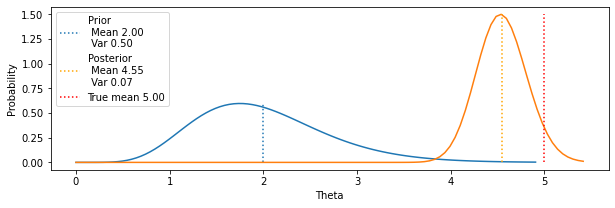

In [21]:
plt.figure(figsize = (10,3))
plt.plot(x, pi.pdf(x))
plt.vlines(pi.mean(), 0, pi.pdf(x).max(), ls=':', label = 'Prior \n Mean {:.2f} \n Var {:.2f}'.format(pi.mean(), pi.var()))

plt.plot(x_post, pi_post.pdf(x_post))
plt.vlines(pi_post.mean(), 0, pi_post.pdf(x_post).max(), ls=':', color='orange', label = 'Posterior \n Mean {:.2f} \n Var {:.2f}'.format(pi_post.mean(), pi_post.var()))

plt.vlines(5, 0, 1.5, ls=':', color='red', label = 'True mean {:.2f}'.format(5))
plt.legend()
plt.xlabel('Theta')
plt.ylabel('Probability')
plt.savefig('/nfs/scistore12/gaspgrp/emaksimo/courses/CompBayesStat/plots/Ex1_2_Fig1.png')

In [20]:
print(pi.interval(alpha=0.95))
print(pi_post.interval(alpha=0.95))

(13.81532870699401, 57.690701446809506)
(16545.440723890486, 20823.76486113065)
